In [29]:
import pandas as pd 
import pymongo
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [122]:
def analyze_comment_count(df):

    print("Total videos", len(df))
    print("Total comments", df['comment_count'].sum())
    # Calculate the percentage of posts in each category
    total_posts = len(df)
    posts_with_0_comments = (df['comment_count'] == 0).sum()
    posts_between_1_and_100_comments = ((df['comment_count'] >= 1) & (df['comment_count'] <= 100)).sum()
    posts_between_100_and_200comments = ((df['comment_count'] >= 100) & (df['comment_count'] <= 200)).sum()
    posts_between_200_and_500_comments = ((df['comment_count'] > 200) & (df['comment_count'] <= 500)).sum()
    posts_between__500_and_1000_comments = ((df['comment_count'] > 500) & (df['comment_count'] < 1000)).sum()
    posts_over_1000_comments = (df['comment_count'] > 1000).sum()

    percentage_0_comments = (posts_with_0_comments / total_posts) * 100
    percentage_1_and_100_comments = (posts_between_1_and_100_comments / total_posts) * 100
    percentage_100_and_200_comments = (posts_between_100_and_200comments / total_posts) * 100
    percentage_200_and_500_comments = (posts_between_200_and_500_comments / total_posts) * 100
    percentage_500_and_1000_comments = (posts_between__500_and_1000_comments / total_posts) * 100
    percentage_over_1000_comments = (posts_over_1000_comments / total_posts) * 100

    print("Percentage of posts with:")
    print(f"0 comments: {percentage_0_comments:.2f}%")
    print(f"1-100 comments: {percentage_1_and_100_comments:.2f}%")
    print(f"100-200 comments: {percentage_100_and_200_comments:.2f}%")
    print(f"200-500 comments: {percentage_200_and_500_comments:.2f}%")
    print(f"500-1000 comments: {percentage_500_and_1000_comments:.2f}%")
    print(f"Over 1000 comments: {percentage_over_1000_comments:.2f}%")

    description = df['comment_count'].describe()

    # Calculate skewness and kurtosis
    skewness = df['comment_count'].skew()
    kurtosis = df['comment_count'].kurtosis()

    print("Descriptive Statistics for comment_count:")
    print(description)
    print("\nSkewness:", skewness)
    print("Kurtosis:", kurtosis)

    # Remove rows with less than 100 comments and cap over 1000 to 1000
    df = df[df['comment_count'] >= 100]
    df['comment_count_capped'] = df['comment_count'].apply(lambda x: min(x, 1000))
    total_posts = len(df)
    print("Total videos", len(df))
    print("Total comments", df['comment_count_capped'].sum())
    posts_with_0_comments = (df['comment_count_capped'] == 0).sum()
    posts_between_1_and_100_comments = ((df['comment_count_capped'] >= 1) & (df['comment_count_capped'] <= 100)).sum()
    posts_between_100_and_200comments = ((df['comment_count_capped'] >= 100) & (df['comment_count_capped'] <= 200)).sum()
    posts_between_200_and_500_comments = ((df['comment_count_capped'] > 200) & (df['comment_count_capped'] <= 500)).sum()
    posts_between__500_and_1000_comments = ((df['comment_count_capped'] > 500) & (df['comment_count_capped'] < 1000)).sum()
    posts_over_1000_comments = (df['comment_count_capped'] > 1000).sum()

    percentage_0_comments = (posts_with_0_comments / total_posts) * 100
    percentage_1_and_100_comments = (posts_between_1_and_100_comments / total_posts) * 100
    percentage_100_and_200_comments = (posts_between_100_and_200comments / total_posts) * 100
    percentage_200_and_500_comments = (posts_between_200_and_500_comments / total_posts) * 100
    percentage_500_and_1000_comments = (posts_between__500_and_1000_comments / total_posts) * 100
    percentage_over_1000_comments = (posts_over_1000_comments / total_posts) * 100

    print("Percentage of posts with:")
    print(f"0 comments: {percentage_0_comments:.2f}%")
    print(f"1-100 comments: {percentage_1_and_100_comments:.2f}%")
    print(f"100-200 comments: {percentage_100_and_200_comments:.2f}%")
    print(f"200-500 comments: {percentage_200_and_500_comments:.2f}%")
    print(f"500-1000 comments: {percentage_500_and_1000_comments:.2f}%")
    print(f"Over 1000 comments: {percentage_over_1000_comments:.2f}%")

    description = df['comment_count_capped'].describe()

    skewness = df['comment_count_capped'].skew()
    kurtosis = df['comment_count_capped'].kurtosis()

    print("Descriptive Statistics for comment_count:")
    print(description)
    print("\nSkewness:", skewness)
    print("Kurtosis:", kurtosis)

    total_count = len(df)
    prob_distribution = df['comment_count_capped'].value_counts(normalize=False).sort_index()

    plt.figure(figsize=(10, 6))
    plt.hist(df['comment_count_capped'], bins=10, alpha=0.7, color='blue', edgecolor='black', density=False)
    plt.xlabel('Comment Count (Capped)')
    plt.ylabel('Probability Density')
    plt.title('Probability Distribution of Comment Count (Capped at 1000, Excluding <100)')
    plt.grid(True)
    plt.show()

    print("Probability Distribution:")
    print(prob_distribution)

Total videos 168761
Total comments 6522670
Percentage of posts with:
0 comments: 37.46%
1-100 comments: 59.76%
100-200 comments: 1.09%
200-500 comments: 0.79%
500-1000 comments: 0.36%
Over 1000 comments: 0.57%
Descriptive Statistics for comment_count:
count    168761.000000
mean         38.650340
std         976.353577
min           0.000000
25%           0.000000
50%           1.000000
75%           5.000000
max      288676.000000
Name: comment_count, dtype: float64

Skewness: 183.6286094087548
Kurtosis: 48438.97108881126
Total videos 4722
Total comments 2051264
Percentage of posts with:
0 comments: 0.00%
1-100 comments: 0.76%
100-200 comments: 38.90%
200-500 comments: 28.12%
500-1000 comments: 12.71%
Over 1000 comments: 0.00%
Descriptive Statistics for comment_count:
count    4722.000000
mean      434.405760
std       342.427595
min       100.000000
25%       148.000000
50%       271.000000
75%       747.750000
max      1000.000000
Name: comment_count_capped, dtype: float64

Skewness

C:\Users\vrace\AppData\Local\Temp\ipykernel_9088\1294359617.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment_count_capped'] = df['comment_count'].apply(lambda x: min(x, 1000))


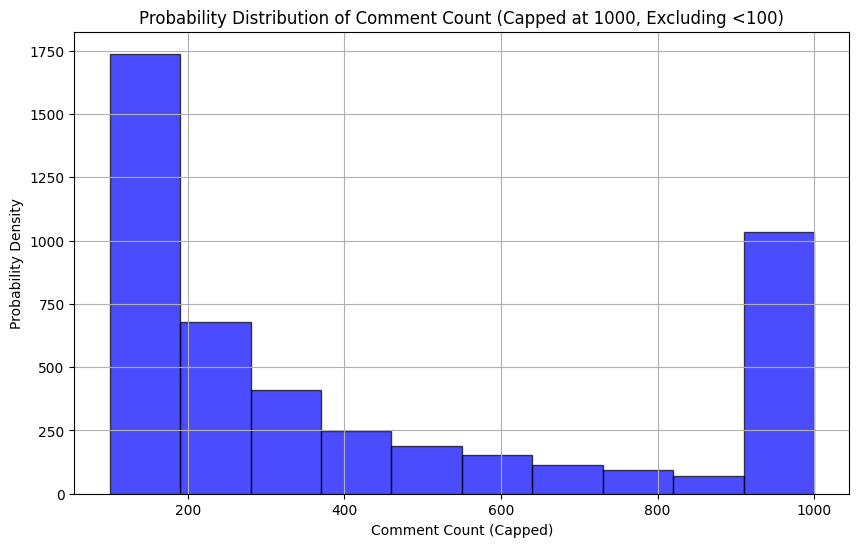

Probability Distribution:
comment_count_capped
100      36
101      32
102      37
103      29
104      33
       ... 
995       2
997       1
998       5
999       1
1000    957
Name: count, Length: 721, dtype: int64


In [123]:
path_to_videos = "../dataset/tiktok_videos.csv"
df = pd.read_csv(path_to_videos)
analyze_comment_count(df)


In [120]:
sample = df.sample(10000)

print(len(sample))
sample = sample[sample['comment_count'] >= 1]
print("posts_with_comments:", len(sample))
total_comments = sample['comment_count'].sum()
print(total_comments)
sample['comment_count_capped'] = sample['comment_count'].apply(lambda x: min(x, 1000))
real_comments = sample['comment_count_capped'].sum()
print(real_comments)

10000
posts_with_comments: 6214
251735
153900


In [124]:
sample.to_csv("tiktok_videos_sample.csv")

Total videos 6214
Total comments 251735
Percentage of posts with:
0 comments: 0.00%
1-100 comments: 95.98%
100-200 comments: 1.51%
200-500 comments: 1.29%
500-1000 comments: 0.55%
Over 1000 comments: 0.00%
Descriptive Statistics for comment_count:
count     6214.000000
mean        40.510943
std        489.443441
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max      31337.000000
Name: comment_count, dtype: float64

Skewness: 46.89206682443214
Kurtosis: 2780.3889644104665
Total videos 252
Total comments 104633
Percentage of posts with:
0 comments: 0.00%
1-100 comments: 0.79%
100-200 comments: 37.30%
200-500 comments: 31.75%
500-1000 comments: 13.49%
Over 1000 comments: 0.00%
Descriptive Statistics for comment_count:
count     252.000000
mean      415.210317
std       329.610393
min       100.000000
25%       142.250000
50%       266.500000
75%       631.000000
max      1000.000000
Name: comment_count_capped, dtype: float64

Skewness: 0.857886209

C:\Users\vrace\AppData\Local\Temp\ipykernel_9088\3005902387.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment_count_capped'] = df['comment_count'].apply(lambda x: min(x, 1000))


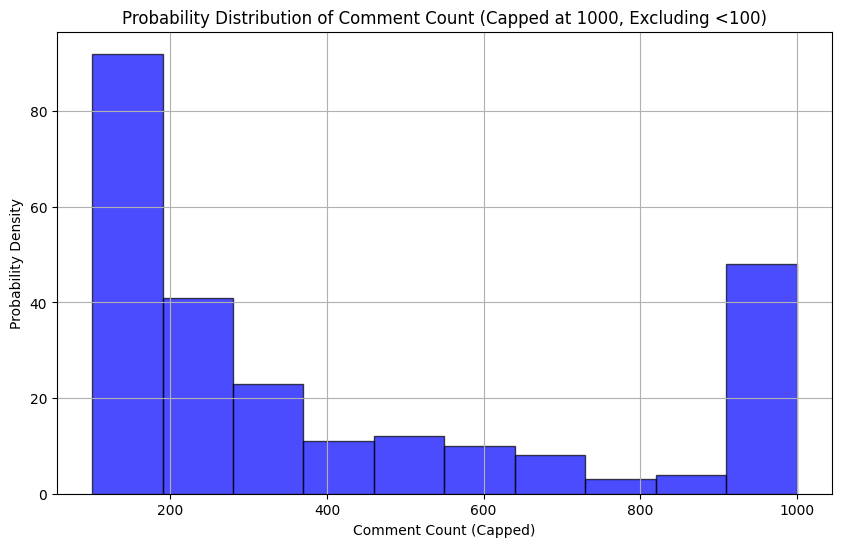

Probability Distribution:
comment_count_capped
100      2
102      2
104      3
105      3
106      3
        ..
915      1
927      1
954      1
964      1
1000    44
Name: count, Length: 165, dtype: int64


In [121]:
analyze_comment_count(sample)

Total videos 7467
Total comments 420062
Percentage of posts with:
0 comments: 36.82%
1-100 comments: 59.57%
100-200 comments: 1.22%
200-500 comments: 0.88%
500-1000 comments: 0.50%
Over 1000 comments: 0.00%
Descriptive Statistics for comment_count:
count     7467.000000
mean        56.255792
std        572.761240
min          0.000000
25%          0.000000
50%          1.000000
75%          6.000000
max      16833.000000
Name: comment_count, dtype: float64

Skewness: 19.315983365376013
Kurtosis: 444.61280577179764
Total videos 271
Total comments 136890
Percentage of posts with:
0 comments: 0.00%
1-100 comments: 0.37%
100-200 comments: 33.58%
200-500 comments: 24.35%
500-1000 comments: 13.65%
Over 1000 comments: 0.00%
Descriptive Statistics for comment_count:
count     271.000000
mean      505.129151
std       368.222932
min       100.000000
25%       156.000000
50%       342.000000
75%      1000.000000
max      1000.000000
Name: comment_count_capped, dtype: float64

Skewness: 0.3595063

C:\Users\vrace\AppData\Local\Temp\ipykernel_9088\3005902387.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment_count_capped'] = df['comment_count'].apply(lambda x: min(x, 1000))


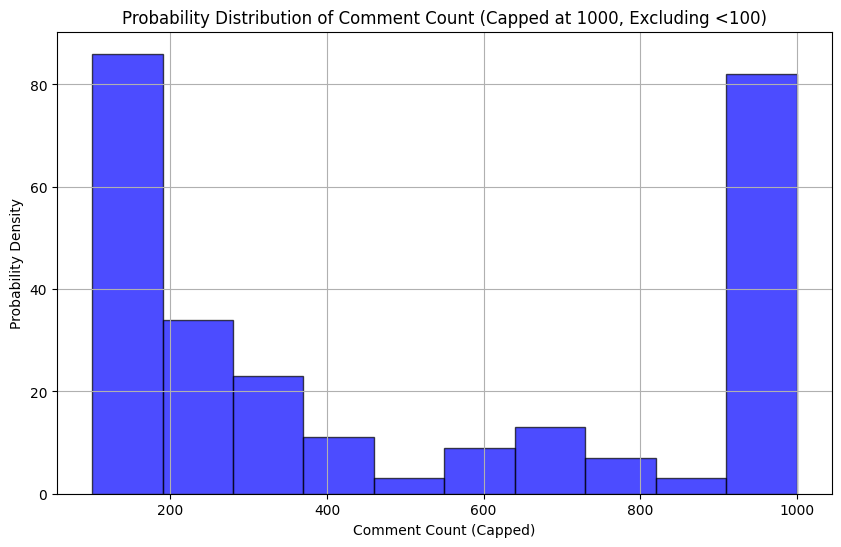

Probability Distribution:
comment_count_capped
100      1
101      1
103      2
104      2
105      1
        ..
943      1
955      1
964      1
969      1
1000    77
Name: count, Length: 142, dtype: int64


In [111]:
path_to_videos = "../dataset/tiktok_videos.csv"
df1 = pd.read_csv(path_to_videos)
df2 = pd.read_csv("../dataset/florida_df.csv")
df2 = df2.loc[df2['source'] == "Tiktok"]
df1['id'] = df1['id'].astype('int64')
df2['id'] = df2['id'].astype('int64')

merged_df = pd.merge(df2, df1, on='id', how='inner')
analyze_comment_count(merged_df)

Total videos 7467
Total comments 420062
Percentage of posts with:
0 comments: 36.82%
1-10 comments: 46.83%
10-100 comments: 12.74%
100-1000 comments: 2.58%
Over 1000 comments: 1.03%
Descriptive Statistics for comment_count:
count     7467.000000
mean        56.255792
std        572.761240
min          0.000000
25%          0.000000
50%          1.000000
75%          6.000000
max      16833.000000
Name: comment_count, dtype: float64

Skewness: 19.315983365376013
Kurtosis: 444.61280577179764
Total videos 271
Total comments 136890
Percentage of posts with:
0 comments: 0.00%
1-10 comments: 33.58%
10-100 comments: 24.35%
100-1000 comments: 13.65%
Over 1000 comments: 28.41%
Descriptive Statistics for comment_count:
count     271.000000
mean      505.129151
std       368.222932
min       100.000000
25%       156.000000
50%       342.000000
75%      1000.000000
max      1000.000000
Name: comment_count_capped, dtype: float64

Skewness: 0.35950631052723064
Kurtosis: -1.6269180813686317


C:\Users\vrace\AppData\Local\Temp\ipykernel_9088\3551779183.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment_count_capped'] = df['comment_count'].apply(lambda x: min(x, 1000))


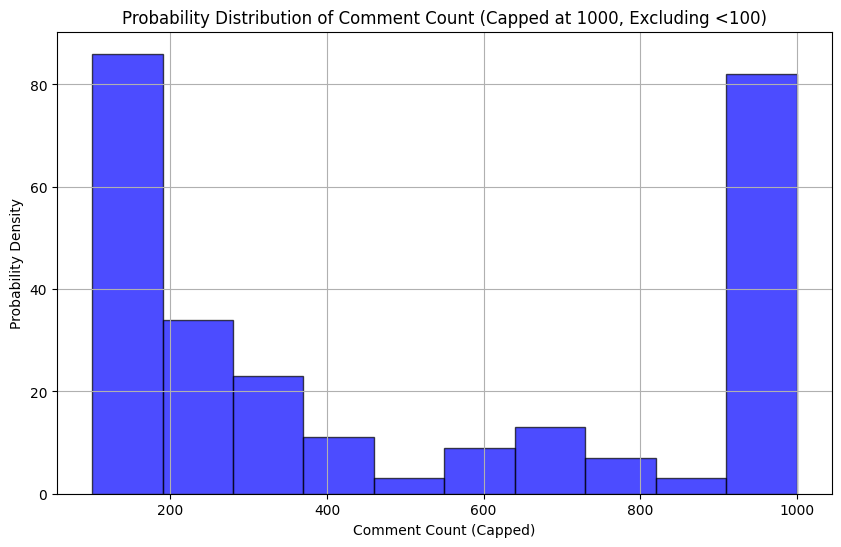

Probability Distribution:
comment_count_capped
100      1
101      1
103      2
104      2
105      1
        ..
943      1
955      1
964      1
969      1
1000    77
Name: count, Length: 142, dtype: int64


In [96]:
df = merged_df
print("Total videos", len(df))
print("Total comments", df['comment_count'].sum())
total_posts = len(df)
posts_with_0_comments = (df['comment_count'] == 0).sum()
posts_between_1_and_10_comments = ((df['comment_count'] >= 1) & (df['comment_count'] <= 10)).sum()
posts_between_10_and_100_comments = ((df['comment_count'] > 10) & (df['comment_count'] <= 100)).sum()
posts_between_100_and_1000_comments = ((df['comment_count'] > 100) & (df['comment_count'] <= 1000)).sum()
posts_over_1000_comments = (df['comment_count'] > 1000).sum()

percentage_0_comments = (posts_with_0_comments / total_posts) * 100
percentage_1_to_10_comments = (posts_between_1_and_10_comments / total_posts) * 100
percentage_10_to_100_comments = (posts_between_10_and_100_comments / total_posts) * 100
percentage_100_to_1000_comments = (posts_between_100_and_1000_comments / total_posts) * 100
percentage_over_1000_comments = (posts_over_1000_comments / total_posts) * 100

print("Percentage of posts with:")
print(f"0 comments: {percentage_0_comments:.2f}%")
print(f"1-10 comments: {percentage_1_to_10_comments:.2f}%")
print(f"10-100 comments: {percentage_10_to_100_comments:.2f}%")
print(f"100-1000 comments: {percentage_100_to_1000_comments:.2f}%")
print(f"Over 1000 comments: {percentage_over_1000_comments:.2f}%")

description = df['comment_count'].describe()

skewness = df['comment_count'].skew()
kurtosis = df['comment_count'].kurtosis()

print("Descriptive Statistics for comment_count:")
print(description)
print("\nSkewness:", skewness)
print("Kurtosis:", kurtosis)

df = df[df['comment_count'] >= 100]
df['comment_count_capped'] = df['comment_count'].apply(lambda x: min(x, 1000))
total_posts = len(df)
print("Total videos", len(df))
print("Total comments", df['comment_count_capped'].sum())
posts_with_0_comments = (df['comment_count_capped'] == 0).sum()
posts_between_1_and_10_comments = ((df['comment_count_capped'] >= 100) & (df['comment_count_capped'] <= 200)).sum()
posts_between_10_and_100_comments = ((df['comment_count_capped'] > 200) & (df['comment_count_capped'] <= 500)).sum()
posts_between_100_and_1000_comments = ((df['comment_count_capped'] > 500) & (df['comment_count_capped'] < 1000)).sum()
posts_over_1000_comments = (df['comment_count_capped'] == 1000).sum()

percentage_0_comments = (posts_with_0_comments / total_posts) * 100
percentage_1_to_10_comments = (posts_between_1_and_10_comments / total_posts) * 100
percentage_10_to_100_comments = (posts_between_10_and_100_comments / total_posts) * 100
percentage_100_to_1000_comments = (posts_between_100_and_1000_comments / total_posts) * 100
percentage_over_1000_comments = (posts_over_1000_comments / total_posts) * 100

print("Percentage of posts with:")
print(f"0 comments: {percentage_0_comments:.2f}%")
print(f"1-10 comments: {percentage_1_to_10_comments:.2f}%")
print(f"10-100 comments: {percentage_10_to_100_comments:.2f}%")
print(f"100-1000 comments: {percentage_100_to_1000_comments:.2f}%")
print(f"Over 1000 comments: {percentage_over_1000_comments:.2f}%")

description = df['comment_count_capped'].describe()

skewness = df['comment_count_capped'].skew()
kurtosis = df['comment_count_capped'].kurtosis()

print("Descriptive Statistics for comment_count:")
print(description)
print("\nSkewness:", skewness)
print("Kurtosis:", kurtosis)

total_count = len(df)
prob_distribution = df['comment_count_capped'].value_counts(normalize=False).sort_index()

plt.figure(figsize=(10, 6))
plt.hist(df['comment_count_capped'], bins=10, alpha=0.7, color='blue', edgecolor='black', density=False)
plt.xlabel('Comment Count (Capped)')
plt.ylabel('Probability Density')
plt.title('Probability Distribution of Comment Count (Capped at 1000, Excluding <100)')
plt.grid(True)
plt.show()

print("Probability Distribution:")
print(prob_distribution)

In [ ]:
path_to_videos = "dataset/tiktok_videos.csv"
df = pd.read_csv(path_to_videos)
total_vids = len(df)
df = df[df['comment_count'] != 0]
video_ids = df["id"].to_list() # This part should read from videos collection for the general purpose of the crawler